# Boston Motor Vehicle Incidents# 

### Introduction ##
In this notebook we will be analysing the Crime Incident Reports of the city of Boston, US, in the years 2016-2018. The actual dataset contains records for events from June 2015 to January, 2019. This report is provided by the Boston Police Department (BPD) "to document the initial details surrounding an incident to which BPD officers respond" [Source](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system).

Since there are more than 355k events registered in this dataset, we will only be focusing at the incidents related to motor vehicles.



### What is the structure of your dataset?

> Police responses are logged and reported chronologically by the Boston Police Department.

### What are the main feature(s) of interest in your dataset?

> We will be focusing on the "OFFENSE_CODE_GROUP" column/feature, which is the "internal categorization" of the incident.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The "OCCURED_ON_DATE" will be one of our most valuable assets. We will look at days, months and years.
> The "INCIDENT_NUMBER" will help us with counting events.
> "SHOOTING" indicates if a shooting took place.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap 

%matplotlib inline


import os

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


### First we start by importing our dataset and taking a peak.

In [2]:
df = pd.read_csv('crime.csv', engine='python')

In [3]:
df.shape

(355344, 17)

In [4]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
0      I192004100          2907            Violations   
1      I192004093          3006    Medical Assistance   
2      I192004088           619               Larceny   
3      I192004086          3201         Property Lost   
4      I192004085          3108  Fire Related Reports   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0      VAL - OPERATING AFTER REV/SUSP.      NaN                     NaN   
1        SICK/INJURED/MEDICAL - PERSON      E13            906      NaN   
2                   LARCENY ALL OTHERS      C11            402      NaN   
3                      PROPERTY - LOST      C11            387      NaN   
4  FIRE REPORT - HOUSE, BUILDING, ETC.       D4            285      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART      STREET  \
0  2019-01-15 20:39:00  2019      1     Tuesday    20    Part Two         NaN   
1  2019-01-15 21:18:00  2019      1     Tuesday    21  Part Three   WALDEN ST   
2  2019-01-15 21:30:00  2019      1     Tuesday    21    Part One     BURT ST   
3  2019-01-15 20:48:00  2019      1     Tuesday    20  Part Three    ADAMS ST   
4  2019-01-15 20:29:00  2019      1     Tuesday    20  Part Three  TREMONT ST   

         Lat       Long                     Location  
0  42.306714 -71.087418  (42.30671431, -71.08741801)  
1  42.325610 -71.104500  (42.32561013, -71.10449956)  
2  42.284135 -71.069574  (42.28413536, -71.06957385)  
3  42.272306 -71.067214  (42.27230624, -71.06721386)  
4  42.336409 -71.085650  (42.33640891, -71.08565039)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355344 entries, 0 to 355343
Data columns (total 17 columns):
INCIDENT_NUMBER        355344 non-null object
OFFENSE_CODE           355344 non-null int64
OFFENSE_CODE_GROUP     355344 non-null object
OFFENSE_DESCRIPTION    355344 non-null object
DISTRICT               353414 non-null object
REPORTING_AREA         355344 non-null object
SHOOTING               1445 non-null object
OCCURRED_ON_DATE       355344 non-null object
YEAR                   355344 non-null int64
MONTH                  355344 non-null int64
DAY_OF_WEEK            355344 non-null object
HOUR                   355344 non-null int64
UCR_PART               355245 non-null object
STREET                 343984 non-null object
Lat                    333064 non-null float64
Long                   333064 non-null float64
Location               355344 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 46.1+ MB


In [6]:
df['OFFENSE_CODE_GROUP'].value_counts().head(10)

Motor Vehicle Accident Response    41416
Larceny                            29048
Medical Assistance                 26513
Investigate Person                 20717
Other                              20019
Drug Violation                     18358
Simple Assault                     17668
Vandalism                          17024
Verbal Disputes                    14660
Towed                              12558
Name: OFFENSE_CODE_GROUP, dtype: int64

## As you can see here, "Motor Vehicle Accident Response" is the most common incident summary in the dataset. This is why we will focus on motor vehicle related incidents. 

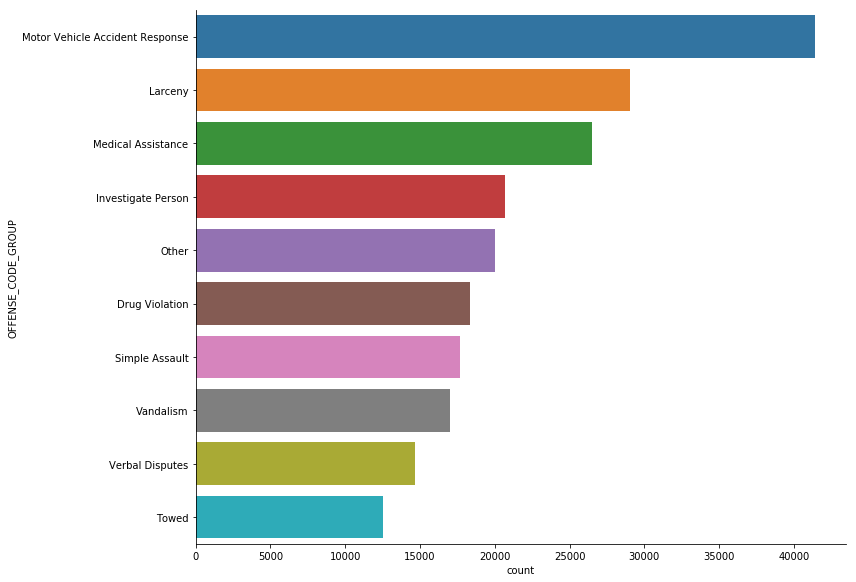

In [7]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=df['OFFENSE_CODE_GROUP'].value_counts().head(10).index,
           data=df);

### Here we will cover all incidents related to motor vehicles.

In [8]:
auto = df[df['OFFENSE_CODE_GROUP'].str.contains(r'Motor|Vehicle|Accident|Tow|License Plate|Auto|M/V|Traffic|Speeding', regex=True)]

In [9]:
auto.head(3)

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
17      I192004058          3802  Motor Vehicle Accident Response   
20      I192004055          3801  Motor Vehicle Accident Response   
23      I192004051           727                       Auto Theft   

                   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
17    M/V ACCIDENT - PROPERTY Â DAMAGE      C11            344      NaN   
20                M/V ACCIDENT - OTHER       C6            208      NaN   
23  AUTO THEFT - LEASED/RENTED VEHICLE       A1             95      NaN   

       OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
17  2019-01-15 18:56:00  2019      1     Tuesday    18  Part Three   
20  2019-01-15 19:22:00  2019      1     Tuesday    19  Part Three   
23  2019-01-09 16:30:00  2019      1   Wednesday    16    Part One   

          STREET        Lat       Long                     Location  
17     CORONA ST  42.300978 -71.070773  (42.30097791, -71.07077333)  
20    E FIRST ST  42.338145 -71.035495  (42.33814528, -71.03549527)  
23  ATLANTIC AVE  42.357464 -71.050982  (42.35746445, -71.05098164)

### Let's take care of some formatting and cleaning first!

In [10]:
# Let's Convert the event date to datetime format
auto['OCCURRED_ON_DATE'] = pd.to_datetime(auto['OCCURRED_ON_DATE'])

# We will fill empty values with "N" for no shootings. 
# "Y" means the incident were realted to a shooting

auto.SHOOTING.fillna('N', inplace=True)


#  We will convert the 'DAY_OF_WEEK' column to be a category.
auto.DAY_OF_WEEK = pd.Categorical(auto.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)


# Let's also replace the placeholder values of 'Lat' and 'Long'.

auto.Lat.replace(-1, None, inplace=True)
auto.Long.replace(-1, None, inplace=True)



# Let's also drop some columns we won't be using. 

auto = auto.drop(['REPORTING_AREA', 'UCR_PART', 'DISTRICT'], axis=1)

### We will only analyze years 2016, 2017 and 2018 for the following reasons: ###
- Events for the year 2015 start in the month of June (Only half a year).
- Only only have two weeks for the year 2019. 
- Only focusing on years 2016-2018 will give us a better perspective and will avoid misconceptions. 

*Please keep in mind the visualizations below will display event counts for all three years, unless otherwise specified. 

In [11]:
auto = auto[(auto.YEAR > 2015) & ((auto.YEAR < 2019))]

#### What are the categories of motor vehicle related incidents?

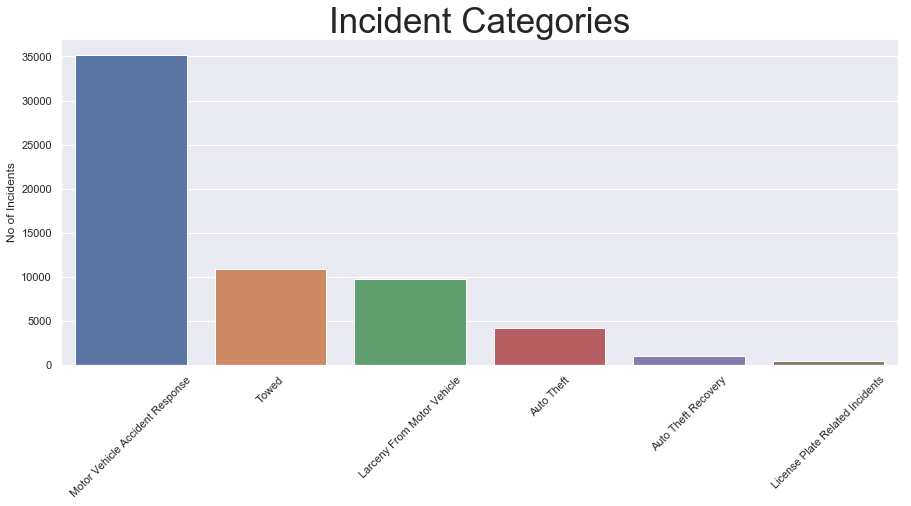

In [12]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='OFFENSE_CODE_GROUP',data=auto, order=auto['OFFENSE_CODE_GROUP'].value_counts().index)
plt.xticks(rotation=45)
plt.ylabel('No of Incidents')
plt.xlabel("");
plt.title("Incident Categories", size=35)
plt.show()

### Though most of the police responses are listed as "Motor Vehicle Accident Response", many others resulted in vehicles being towed. Larceny and Auto Theft are closely related, if combined, these would be second in the list.

### Let's look at the incidents per hour in the day.

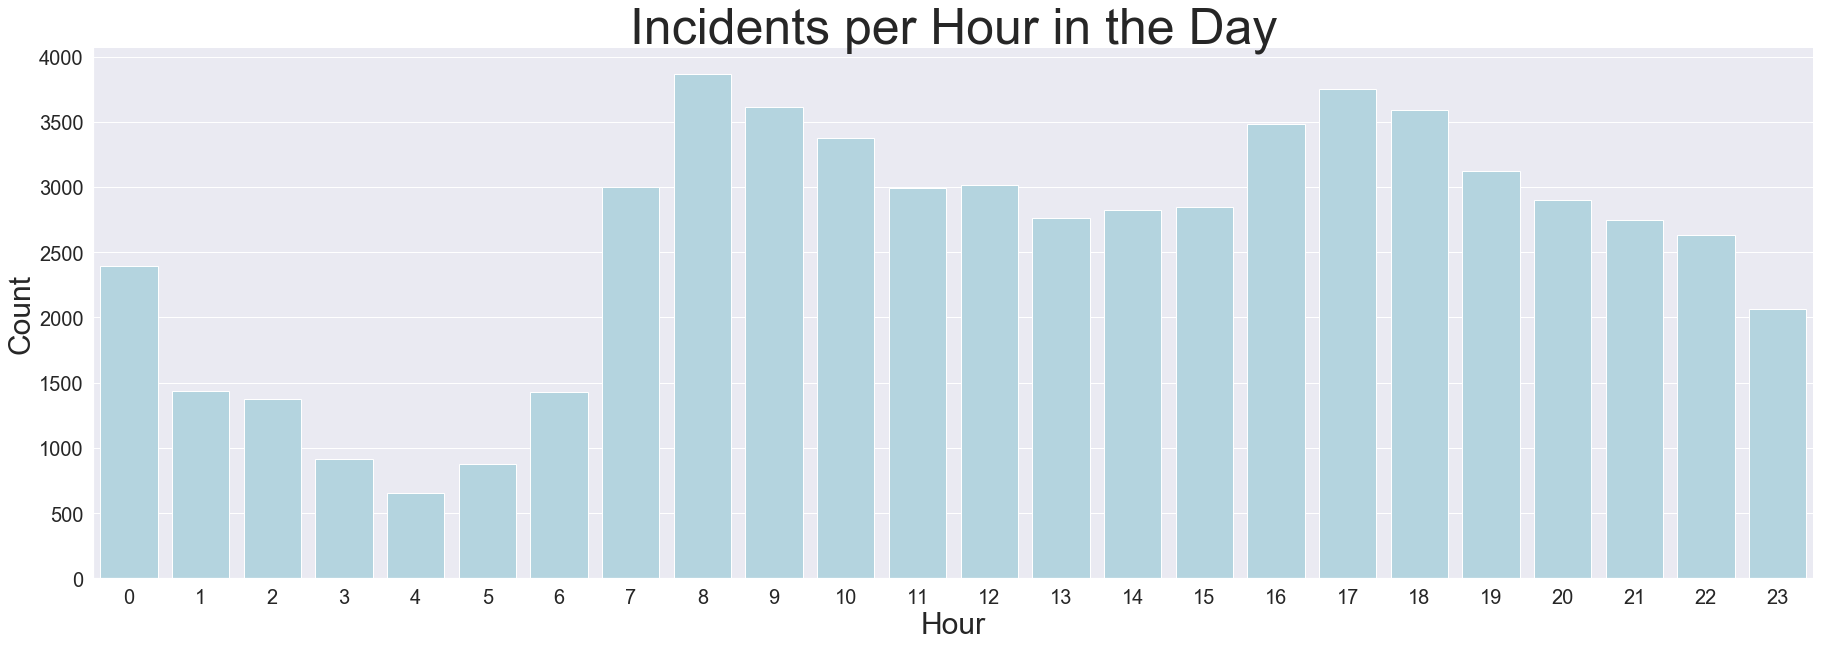

In [13]:
sns.catplot(x='HOUR',
           kind='count',
            height=8.27, 
            aspect=3,
            color='lightblue',
           data=auto)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Hour', fontsize=30);
plt.ylabel('Count', fontsize=30);
plt.title("Incidents per Hour in the Day", size=50);

## Morning and afternoon rush hour times are where most of the incidents take place.

#### Let's divide these by category to get a better sense of the incident events.

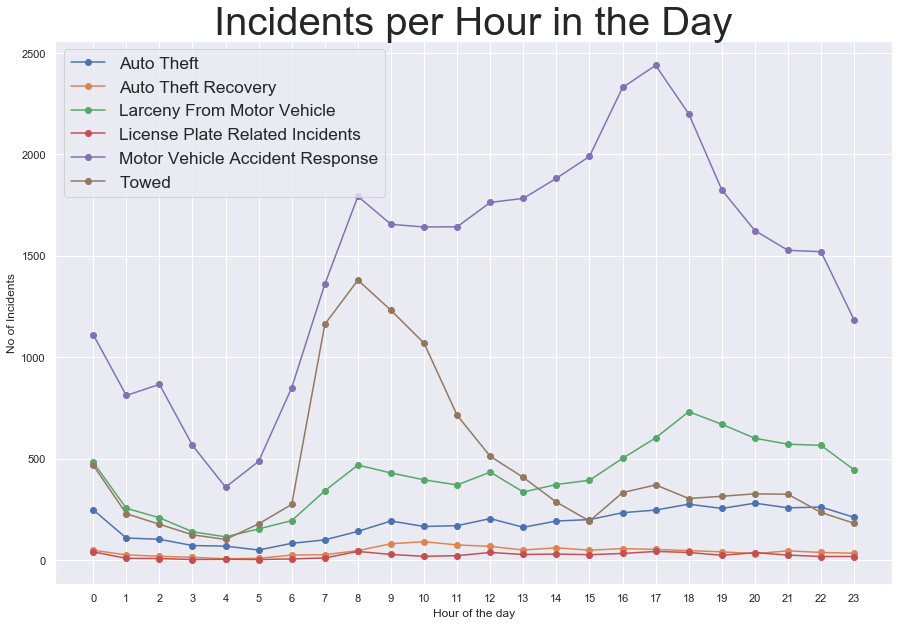

In [14]:
auto.groupby([auto['OCCURRED_ON_DATE'].dt.hour,'OFFENSE_CODE_GROUP',])['INCIDENT_NUMBER'].count().unstack().plot(marker='o', figsize=(15,10))
plt.ylabel('No of Incidents');
plt.xlabel('Hour of the day');
plt.legend(fontsize="x-large");
plt.xticks(np.arange(24));
plt.title("Incidents per Hour in the Day", size=40);

## If you are in Boston, it is most likely to have a motor vehicle accident at around 5pm.

### Okay, so we can see some trends in the hours of the day. How about per day of the week?

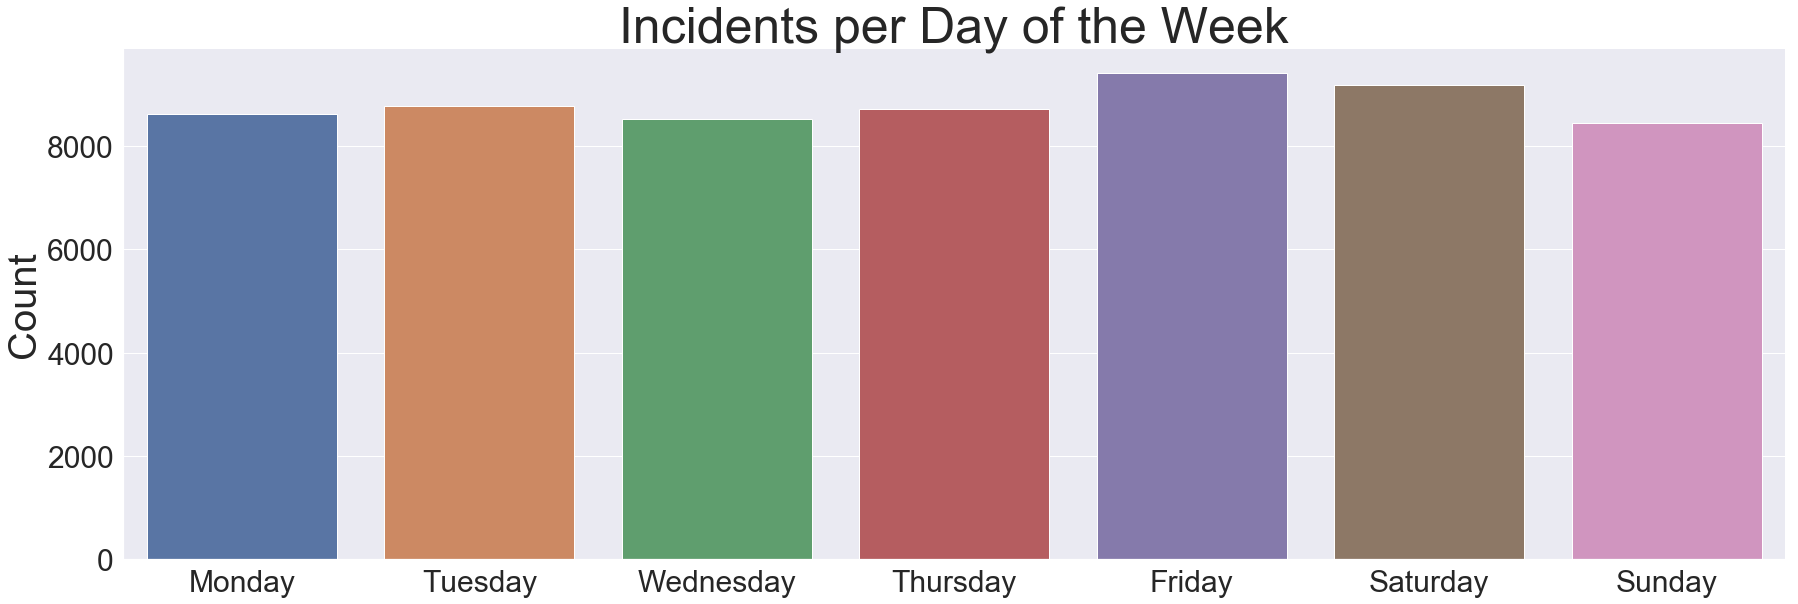

In [15]:
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=8, 
            aspect=3,
           data=auto)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('');
plt.ylabel('Count', fontsize=40);
plt.title("Incidents per Day of the Week", size=50);

## Friday appears to be the most volatile day, followed by Saturday of course.

### How about per months in the year?

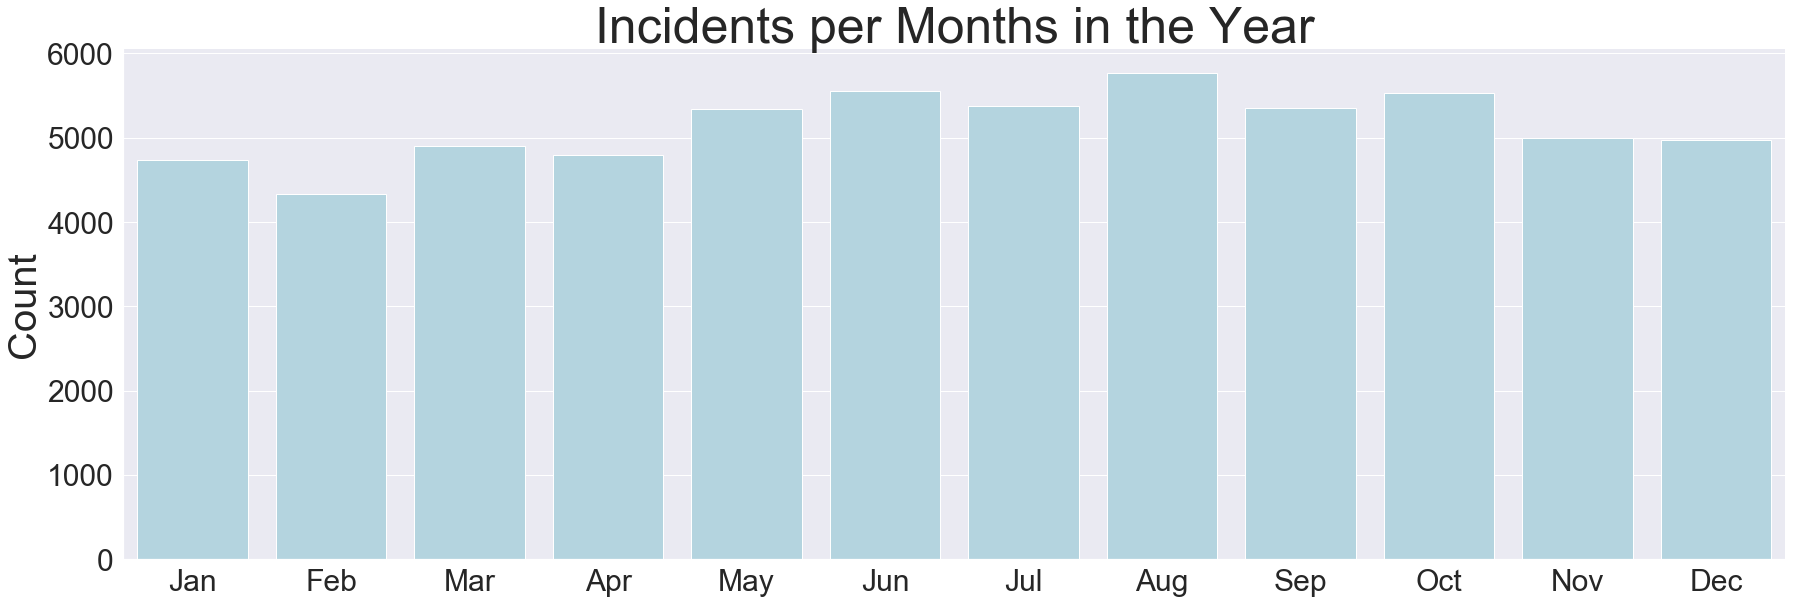

In [16]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='MONTH',
           kind='count',
            height=8, 
            aspect=3,
            color='lightblue',
           data=auto)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('');
plt.ylabel('Count', fontsize=40);
plt.title("Incidents per Months in the Year", size=50);

## August is the month were most incidents take place.

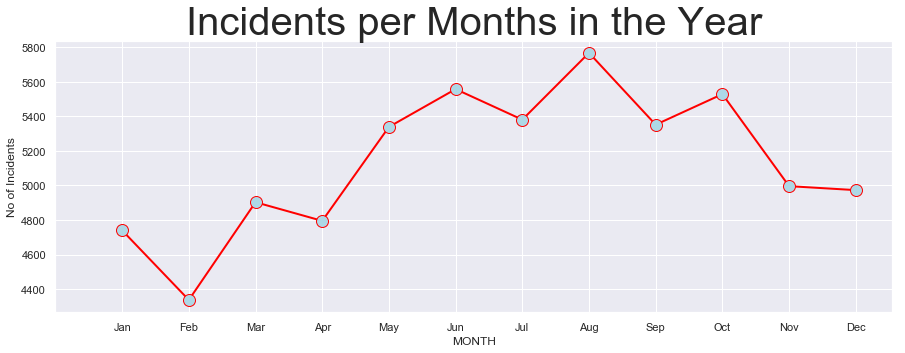

In [17]:
months=['', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
auto.groupby('MONTH')['INCIDENT_NUMBER'].count().plot(marker='o', color='red', linewidth=2, markersize=12, markerfacecolor='lightblue', figsize=(15, 5))
plt.xticks(np.arange(0,13, 1),months)
plt.ylabel('No of Incidents');
plt.title("Incidents per Months in the Year", size=40);

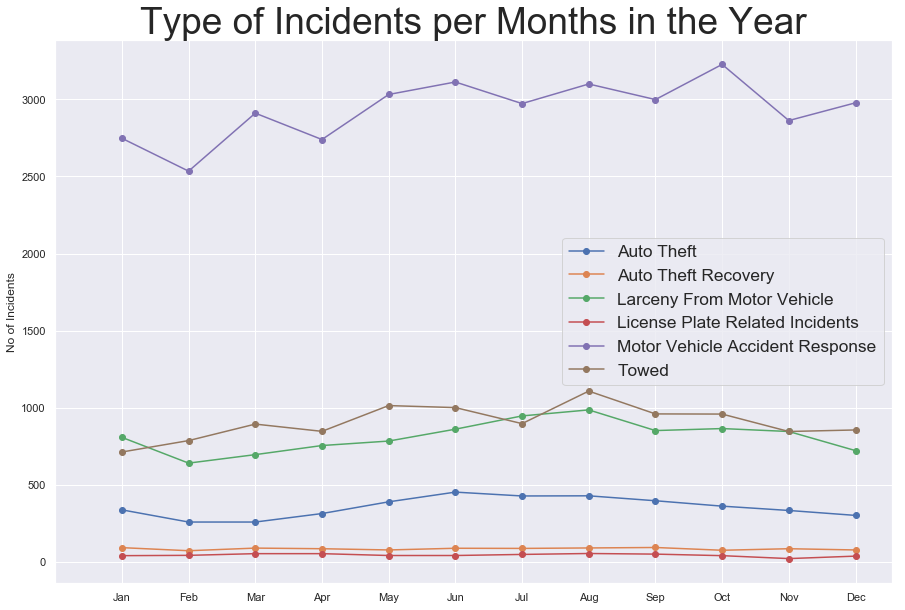

In [18]:
months=['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

auto.groupby([auto['OCCURRED_ON_DATE'].dt.month,'OFFENSE_CODE_GROUP',])['INCIDENT_NUMBER'].count().unstack().plot(marker='o', figsize=(15,10));
plt.ylabel('No of Incidents');
plt.legend(fontsize="x-large");
plt.xlabel("")
plt.xticks(np.arange(0, 13, 1),months);
plt.title("Type of Incidents per Months in the Year", size=37);

### What if we look at every year separately?

## Notice that 2017 had a greater number of incidents than both 2016 and 2018.
> The only month were the number of incidents was higher in 2018, relative to 2017, were June and November. 

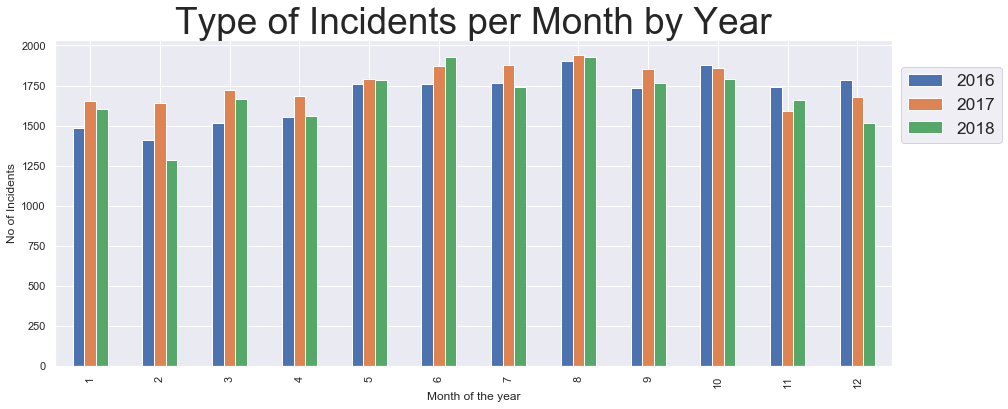

In [19]:
auto.groupby(['MONTH','YEAR'])['INCIDENT_NUMBER'].count().unstack().plot(kind='bar', figsize=(15, 6));
plt.ylabel('No of Incidents');
plt.xlabel("Month of the year");
plt.legend(loc='center left', bbox_to_anchor=(1, .8), fontsize="x-large");
plt.title("Type of Incidents per Month by Year", size=37);

In [20]:
# Motor Vehicle related incidents that involved shootings:
auto[auto.SHOOTING== "Y"]

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
24414       I182082103          3831  Motor Vehicle Accident Response   
53508       I182051210          3410                            Towed   
53509       I182051210          3410                            Towed   
115663      I172093007          3803  Motor Vehicle Accident Response   
118464      I172090013          3410                            Towed   
118465      I172090013          3410                            Towed   
118466      I172090013          3410                            Towed   
125656      I172082312          3802  Motor Vehicle Accident Response   
138641      I172068602          3410                            Towed   
138642      I172068602          3410                            Towed   
140640      I172066494          3831  Motor Vehicle Accident Response   
180383      I172024077          3410                            Towed   
281236      I162022446          3831  Motor Vehicle Accident Response   
281237      I162022446          3831  Motor Vehicle Accident Response   
301937      I162000112          3831  Motor Vehicle Accident Response   

                          OFFENSE_DESCRIPTION SHOOTING    OCCURRED_ON_DATE  \
24414   M/V - LEAVING SCENE - PROPERTY DAMAGE        Y 2018-10-11 15:00:00   
53508                     TOWED MOTOR VEHICLE        Y 2018-06-30 00:41:00   
53509                     TOWED MOTOR VEHICLE        Y 2018-06-30 00:41:00   
115663         M/V ACCIDENT - PERSONAL INJURY        Y 2017-11-06 20:05:00   
118464                    TOWED MOTOR VEHICLE        Y 2017-10-28 01:03:00   
118465                    TOWED MOTOR VEHICLE        Y 2017-10-28 01:03:00   
118466                    TOWED MOTOR VEHICLE        Y 2017-10-28 01:03:00   
125656       M/V ACCIDENT - PROPERTY Â DAMAGE        Y 2017-10-03 02:23:00   
138641                    TOWED MOTOR VEHICLE        Y 2017-08-20 00:03:00   
138642                    TOWED MOTOR VEHICLE        Y 2017-08-20 00:03:00   
140640  M/V - LEAVING SCENE - PROPERTY DAMAGE        Y 2017-08-13 13:58:00   
180383                    TOWED MOTOR VEHICLE        Y 2017-03-28 13:00:00   
281236  M/V - LEAVING SCENE - PROPERTY DAMAGE        Y 2016-03-22 23:33:00   
281237  M/V - LEAVING SCENE - PROPERTY DAMAGE        Y 2016-03-22 23:33:00   
301937  M/V - LEAVING SCENE - PROPERTY DAMAGE        Y 2016-01-07 13:01:00   

        YEAR  MONTH DAY_OF_WEEK  HOUR             STREET        Lat  \
24414   2018     10    Thursday    15       LYNDHURST ST  42.292906   
53508   2018      6    Saturday     0        BRACKETT ST  42.351987   
53509   2018      6    Saturday     0        BRACKETT ST  42.351987   
115663  2017     11      Monday    20  MASSACHUSETTS AVE  42.342439   
118464  2017     10    Saturday     1           CAPEN ST  42.281159   
118465  2017     10    Saturday     1           CAPEN ST  42.281159   
118466  2017     10    Saturday     1           CAPEN ST  42.281159   
125656  2017     10     Tuesday     2          EXETER ST  42.348288   
138641  2017      8      Sunday     0         WELLES AVE  42.289445   
138642  2017      8      Sunday     0         WELLES AVE  42.289445   
140640  2017      8      Sunday    13        COLUMBIA RD  42.308770   
180383  2017      3     Tuesday    13       RIDGEWOOD ST  42.302094   
281236  2016      3     Tuesday    23          SCHOOL ST  42.315505   
281237  2016      3     Tuesday    23          SCHOOL ST  42.315505   
301937  2016      1    Thursday    13      BLUE HILL AVE  42.284826   

             Long                     Location  
24414  -71.069558  (42.29290563, -71.06955795)  
53508  -71.165100  (42.35198700, -71.16510001)  
53509  -71.165100  (42.35198700, -71.16510001)  
115663 -71.084455  (42.34243945, -71.08445530)  
118464 -71.079111  (42.28115946, -71.07911125)  
118465 -71.079111  (42.28115946, -71.07911125)  
118466 -71.079111  (42.28115946, -71.07911125)  
125656 -71.078918  (42.34828759, -71.07891773)  
138641 -71.

### When shootings took place, the majority of incidents resulted in towings.

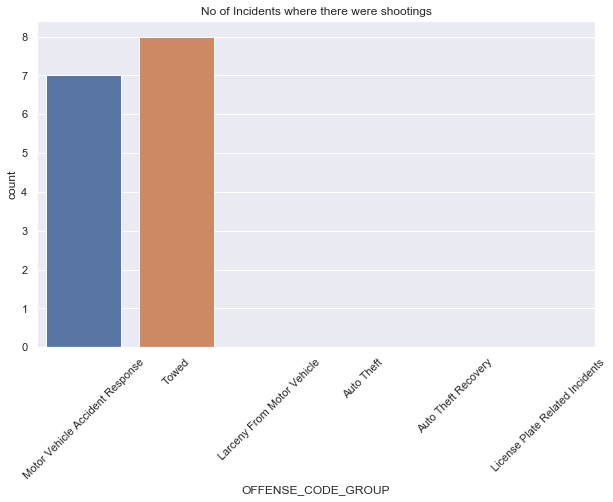

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='OFFENSE_CODE_GROUP',data=auto[auto.SHOOTING== "Y"], order=auto['OFFENSE_CODE_GROUP'].value_counts().index)
plt.xticks(rotation=45)
plt.title('No of Incidents where there were shootings')
plt.show()

### We will plot these in the map to have a better feel for the geographical data.

In [22]:
auto = auto.reset_index(drop=True)

## This Heatmap serves as a "Heat-Check".

In [23]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                      zoom_start = 11)

# Add data for heatmp 
auto_heatmap = auto[['Lat','Long']]
auto_heatmap = auto.dropna(axis=0, subset=['Lat','Long'])
auto_heatmap = [[row['Lat'],row['Long']] for index, row in auto_heatmap.iterrows()]
HeatMap(auto_heatmap[:50000], radius=10).add_to(crime_map)

# Plot!
crime_map

## We can see that these are happening all over the city!

In [24]:
# These are the last 2000 incidents. Looks like these are all over the city. 
map = folium.Map(width=800,
                 height=500,
                 location=[42.33, -71.070],
                 zoom_start=12)
count=0
for i in range(0,len(auto)):
    try:
        folium.Marker([auto.iloc[i]['Lat'], auto.iloc[i]['Long']], popup=auto.iloc[i]['STREET']).add_to(map)
    except:
        pass
    count +=1
    if count > 2000:
        break
map

In [25]:
# Most of the events reported don't have the coordinates. 
auto.Location.value_counts().head(7)

(0.00000000, 0.00000000)       7718
(-1.00000000, -1.00000000)      138
(42.32696647, -71.06198607)     103
(42.33152148, -71.07085307)      84
(42.36067984, -71.05482325)      70
(42.32809966, -71.06321676)      65
(42.36183857, -71.05976489)      64
Name: Location, dtype: int64

In [26]:
# Let's take a look at the top 5 coordinates in our dataset. 
#We skip the first 2 because the are placeholder values*

temp=(auto.Location.value_counts() < 142).index
temp = temp[2:7].tolist()
temp

['(42.32696647, -71.06198607)',
 '(42.33152148, -71.07085307)',
 '(42.36067984, -71.05482325)',
 '(42.32809966, -71.06321676)',
 '(42.36183857, -71.05976489)']

## These are the 5 coordinates you want to stay away from in Boston!

In [27]:
# The furthest you stay away from these coordinates, the safer!
map = folium.Map(width=800,height=500,location=[42.33, -71.070], zoom_start=12)

folium.Marker([42.32696647, -71.06198607]).add_to(map)
folium.Marker([42.33152148, -71.07085307]).add_to(map)
folium.Marker([42.36067984, -71.05482325]).add_to(map)
folium.Marker([42.32809966, -71.06321676]).add_to(map)
folium.Marker([42.36183857, -71.05976489]).add_to(map)
map

## Main Findings

- Though most of the police responses are listed as "Motor Vehicle Accident Response", many others resulted in vehicles being towed. Larceny and Auto Theft are closely related, if combined, these would be second in the list.
- Morning and afternoon rush hour times are where most of the incidents take place.
- If you are in Boston, it is most likely to have a motor vehicle accident at around 5pm.
- Friday appears to be the most volatile day, followed by Saturday of course.
- August is the month were most incidents take place.
- 2017 had a greater number of incidents than both 2016 and 2018.
- The only month were the number of incidents was higher in 2018, relative to 2017, were June and November.
- When shootings took place, the majority of incidents resulted in towings.
- Motor Vehicle related incidents occur all over the city and not just in a specific area.